In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use some functions from tensorflow_docs
#!pip install -q git+https://github.com/tensorflow/docs
    
    
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\Zenia\\.keras\\datasets\\auto-mpg.data'

In [3]:
column_names = ["mpg" , "cylinders" , "displacement", "horsepower" , "weight" ,
               "acceleration", "model year", "origin" ]



raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
378,38.0,4,105.0,63.0,2125.0,14.7,82,1
379,36.0,4,98.0,70.0,2125.0,17.3,82,1
380,36.0,4,120.0,88.0,2160.0,14.5,82,3
381,36.0,4,107.0,75.0,2205.0,14.5,82,3
382,34.0,4,108.0,70.0,2245.0,16.9,82,3
383,38.0,4,91.0,67.0,1965.0,15.0,82,3
384,32.0,4,91.0,67.0,1965.0,15.7,82,3
385,38.0,4,91.0,67.0,1995.0,16.2,82,3
386,25.0,6,181.0,110.0,2945.0,16.4,82,1
387,38.0,6,262.0,85.0,3015.0,17.0,82,1


In [4]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [7]:
dataset['origin'] = dataset['origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))


In [10]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [11]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [26]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

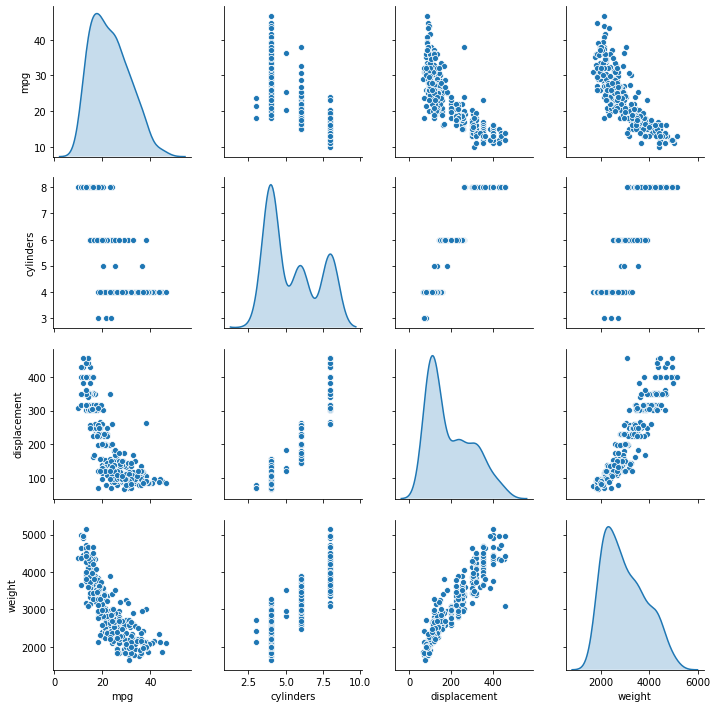

In [27]:
sns.pairplot(train_dataset[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

In [28]:
train_stats = train_dataset.describe()
train_stats.pop("mpg")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [29]:
train_labels = train_dataset.pop('mpg')
test_labels = test_dataset.pop('mpg')

In [30]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [31]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [32]:
model = build_model()

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [34]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.03497362],
       [ 0.16997483],
       [-0.4837774 ],
       [ 0.11891001],
       [-0.03636128],
       [-0.07676299],
       [ 0.00421154],
       [ 0.00220492],
       [-0.16167088],
       [-0.31216717]], dtype=float32)

In [35]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:576.3873,  mae:22.7815,  mse:576.3873,  val_loss:570.5462,  val_mae:22.6023,  val_mse:570.5461,  
....................................................................................................
Epoch: 100, loss:5.6502,  mae:1.6400,  mse:5.6502,  val_loss:8.2769,  val_mae:2.2624,  val_mse:8.2769,  
....................................................................................................
Epoch: 200, loss:5.0774,  mae:1.5686,  mse:5.0774,  val_loss:8.0831,  val_mae:2.2075,  val_mse:8.0831,  
....................................................................................................
Epoch: 300, loss:4.6507,  mae:1.4441,  mse:4.6507,  val_loss:8.4276,  val_mae:2.2397,  val_mse:8.4276,  
....................................................................................................
Epoch: 400, loss:4.1302,  mae:1.3585,  mse:4.1302,  val_loss:8.5025,  val_mae:2.1934,  val_mse:8.5025,  
..............................................................

In [36]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.369921,0.964272,2.369921,10.993723,2.511358,10.993723,995
996,2.288103,0.917086,2.288103,9.710888,2.370325,9.710888,996
997,2.492187,1.044984,2.492187,10.090249,2.383999,10.090249,997
998,2.392508,1.004583,2.392508,10.939580,2.533953,10.939580,998
999,2.340377,0.909868,2.340377,10.283327,2.388700,10.283327,999


Text(0, 0.5, 'MAE [MPG]')

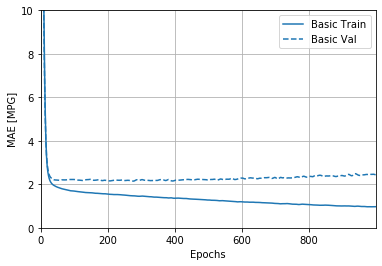

In [39]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

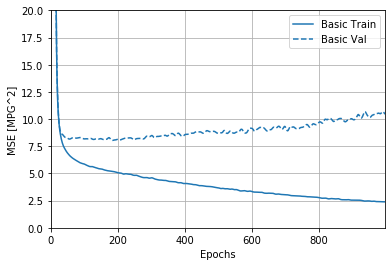

In [40]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [41]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:574.7135,  mae:22.7015,  mse:574.7134,  val_loss:563.1737,  val_mae:22.4330,  val_mse:563.1737,  
...............................................................

Text(0, 0.5, 'MAE [MPG]')

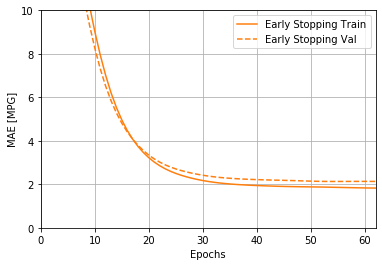

In [42]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [43]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 6.5531 - mae: 1.9971 - mse: 6.5531
Testing set Mean Abs Error:  2.00 MPG


In [ ]:
#https://www.tensorflow.org/tutorials/keras/regression